In [67]:
%matplotlib inline

import pandas as pd
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [68]:
loansData['Interest.Rate'] = [float(i.replace('%','')) for i in loansData['Interest.Rate']]
loansData['Interest.Rate'].max()

24.89

In [69]:
## 24.89 seems reasonable but may be outlier among others (get rid of over 20%?)
loansData['Loan.Length'] = [int(i.replace(' months','')) for i in loansData['Loan.Length']]
loansData['Loan.Length'].max()

60

In [70]:
## Choose lower limit of FICO range (arbitrarily chosen, could use midpoint for greater robustness)
loansData['FICO.Range'] = [int(i.split('-')[0]) for i in loansData['FICO.Range']]
loansData['FICO.Range'].max()

830

In [71]:
## monthly income outlier of >$100,000
loansData['Monthly.Income'].idxmax() #returns index of max
loansData.drop(loansData['Monthly.Income'].idxmax(), inplace=True)

In [76]:
## removing N/A rows
## this did not work, come back and fix
## tbh there might not be any NA rows


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
81174,20000,20000.00,8.90,36,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735,14.0,14272.0,2.0,< 1 year
99592,19200,19200.00,12.12,36,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715,12.0,11140.0,1.0,2 years
80059,35000,35000.00,21.98,60,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690,14.0,21977.0,1.0,2 years
15825,10000,9975.00,9.99,36,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695,10.0,9346.0,0.0,5 years
33182,12000,12000.00,11.71,36,credit_card,18.78%,NJ,RENT,3195.00,695,11.0,14469.0,0.0,9 years
62403,6000,6000.00,15.31,36,other,20.05%,CT,OWN,4891.67,670,17.0,10391.0,2.0,3 years
48808,10000,10000.00,7.90,36,debt_consolidation,26.09%,MA,RENT,2916.67,720,10.0,15957.0,0.0,10+ years
22090,33500,33450.00,17.14,60,credit_card,14.70%,LA,MORTGAGE,13863.42,705,12.0,27874.0,0.0,10+ years
76404,14675,14675.00,14.33,36,credit_card,26.92%,CA,RENT,3150.00,685,9.0,7246.0,1.0,8 years
15867,7000,7000.00,6.91,36,credit_card,7.10%,CA,RENT,5000.00,715,8.0,7612.0,0.0,3 years


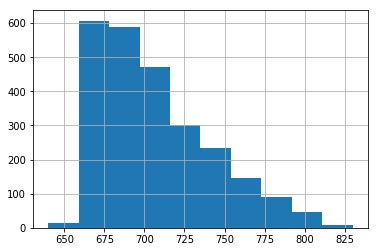

In [78]:
## first create a histogram of FICO score, main component of interest
import matplotlib.pyplot as plt
plt.figure()
## this is no longer the range, it is the floor of the range
loansmin = pd.read_csv('../datasets/loanf.csv')
fico = loansmin['FICO.Score']
p1 = fico.hist()

In [ ]:
## not a normal distribution so further investigation necessary
## what is skewing the distribution?

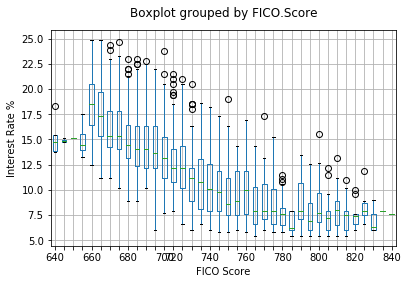

In [80]:
## Box plot
p = loansmin.boxplot('Interest.Rate','FICO.Score')
q = p.set_xticklabels(['640','','','','660','','','','680','','','','700',
  '720','','','','740','','','','760','','','','780','','','','800','','','','820','','','','840'])

q0 = p.set_xlabel('FICO Score')
q1 = p.set_ylabel('Interest Rate %')
q2 = p.set_title('                          ')

In [81]:
## This shows that as scores increase, interest rate decreases
## However, there are still various interest rates for each FICO score
##    Thus, there must be further factors influencing interest rate
## Perhaps if we add size of loan (because of increasing risk with larger loans)
## A SCATTER PLOT is used to check multiple variables

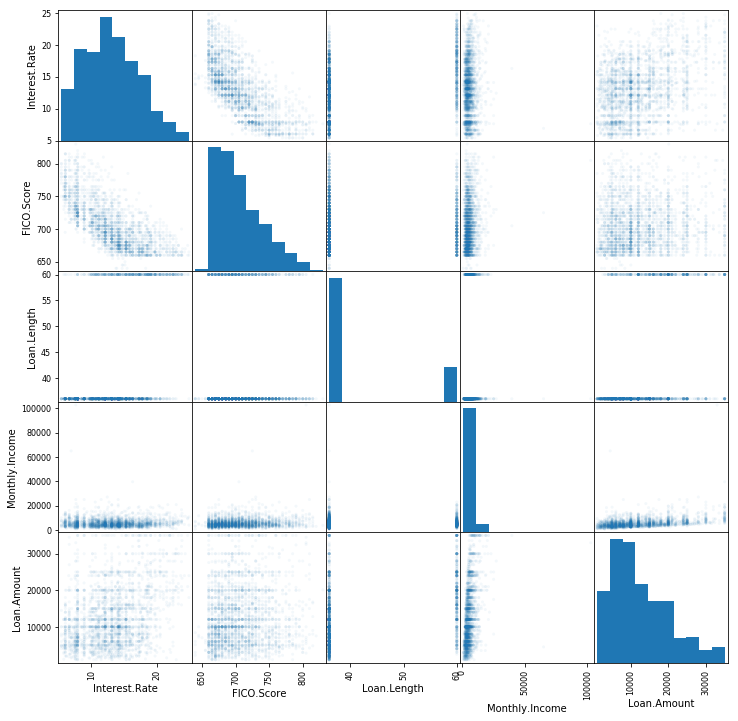

In [84]:
## Scattter Plot
a = pd.plotting.scatter_matrix(loansmin,alpha=0.05,figsize=(12,12), diagonal='hist')
## Click on the line above
## Change 'hist' to 'kde' then hit shift-enter, with the cursor still in this box
## The plot will redraw - it takes a while. While it is recomputing you will see a 
## message-box that says 'Kernel Busy' near the top right corner
## You can change the code and hit shift-enter to re-execute the code
## Try changing the (10,10) to (8,8) and (12,12)
## Try changing the alpha value from 0.05 to 0.5 
## How does this change in alpha change your ability to interpret the data?
## Feel free to try other variations. 
## If at any time you scramble the code and forget the syntax 
## a copy of the original code is below. Copy and paste it in place. 
## a = pd.scatter_matrix(loansmin, alpha=0.05,figsize=(10,10), diagonal='hist)

In [ ]:
## Based on their apparent linear relationships, Loan Amount
## && FICO.Score should be used as the independent variables